In [1]:
#imports
import pandas as pd
data = pd.read_csv('D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/N/SBA_loans_project_2.csv')
data.drop(columns="index",inplace=True)
data.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0


In [2]:
#show unique values in each column
for col in data.columns:
    print(col,":",data[col].unique())
    print("")

City : ['NEW YORK' 'PAWTUCKET' 'ISSAQUAH' ... 'ST  FRANCIS' 'Stevens point'
 'Pylesville']

State : ['NY' 'RI' 'WA' 'TX' 'CA' 'NC' 'MN' 'MO' 'FL' 'IA' 'IL' 'DC' 'PA' 'AL'
 'MS' 'OH' 'MA' 'NJ' 'ME' 'NV' 'LA' 'MI' 'IN' 'GA' 'UT' 'VA' 'WI' 'TN'
 'KS' 'NH' 'CO' 'CT' 'KY' 'AZ' 'ID' 'DE' 'SD' 'AR' 'MD' 'OK' 'SC' 'NM'
 'MT' 'NE' 'OR' 'WY' 'AK' 'HI' 'VT' 'ND' 'WV' nan]

Zip : [10003  2860 98027 ... 78944 17814 95812]

Bank : ['JPMORGAN CHASE BANK NATL ASSOC' 'CITIZENS BANK NATL ASSOC'
 'FIRST-CITIZENS BK & TR CO' ... 'TULSA NATIONAL BANCSHARES, INC'
 'BEACH PLAZA LLC' 'THE LEADERS BANK']

BankState : ['IL' 'RI' 'WA' 'CA' 'NC' 'MN' 'MO' 'OR' 'FL' 'IA' 'SD' 'DC' 'TX' 'PA'
 'VA' 'AL' 'OH' 'MS' 'IN' 'MA' 'ME' 'MI' 'DE' 'UT' 'SC' 'NY' 'KS' 'CO'
 'LA' 'WI' 'CT' 'AZ' 'AR' 'MD' 'OK' 'NM' 'ID' 'MT' 'NJ' 'KY' 'NE' 'WY'
 'GA' 'HI' 'NH' 'VT' 'ND' 'TN' nan 'NV' 'AK' 'WV' 'PR' 'EN' 'GU']

NAICS : [561439 541810 448210 ... 922140 221114 333241]

NoEmp : [   9    8    4    1    3   25   10    2   12    6   21

In [3]:

#find datatype of column
for col in data.columns:
    print(col,":",data[col].dtype)
    

City : object
State : object
Zip : int64
Bank : object
BankState : object
NAICS : int64
NoEmp : int64
NewExist : float64
CreateJob : int64
RetainedJob : int64
FranchiseCode : int64
UrbanRural : int64
RevLineCr : object
LowDoc : object
DisbursementGross : float64
BalanceGross : float64
GrAppv : float64
SBA_Appv : float64
MIS_Status : int64


In [4]:
for i in data['RevLineCr']:
    if i not in ['Y','N']:
        data['RevLineCr'].replace(i,'N',inplace=True)
print("RevLineCr",data['RevLineCr'].unique())

for i in data['LowDoc']:
    if i not in ['Y','N']:
        data['LowDoc'].replace(i,'N',inplace=True)
print("LowDoc",data['LowDoc'].unique())

for i in data['NewExist']:
    if i not in [1,2]:
        data['NewExist'].replace(i,None,inplace=True)
print("NewExist",data['NewExist'].unique())


RevLineCr ['N' 'Y']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None]


In [5]:
#finding and removing null values
missing = data.isnull().sum()
na_col = data.isna().sum()
print(missing[missing>0])
print("---------------------")
print(na_col[na_col>0])

City           26
State          13
Bank         1381
BankState    1386
NewExist     1057
dtype: int64
---------------------
City           26
State          13
Bank         1381
BankState    1386
NewExist     1057
dtype: int64


In [6]:
#replacing misisng values
cat_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']

for column in cat_cols:
    data[column]=data[column].fillna(data[column].mode()[0])

print(data.isnull().sum())

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size=0.2,random_state=42)
train.shape, test.shape

((640204, 19), (160051, 19))

In [8]:
#target encoder
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist', 'UrbanRural']

encoder = ce.TargetEncoder(cols=categorical_columns)
encoder.fit(train, train['MIS_Status'])

train_encoded = encoder.transform(train)

# Renaming the columns
train_encoded = train_encoded.add_suffix('_trg')
train_encoded = pd.concat([train_encoded, train], axis=1)
for column in categorical_columns:
    train_encoded[column + "_trg"].fillna(train_encoded[column + "_trg"].mean(), inplace=True)

train_encoded.drop(columns=categorical_columns, inplace=True)
train_encoded.drop(columns='MIS_Status_trg', inplace=True)
train_encoded.head()


,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,...,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
473658,0.311896,0.165712,43110,0.276163,0.223360,541921,2,0.170871,0,2,...,541921,2,0,2,0,25400.0,0.0,25400.0,12700.0,0
778431,0.148794,0.165712,45371,0.175041,0.159471,541320,3,0.170871,0,3,...,541320,3,0,3,0,41882.0,0.0,25000.0,12500.0,0
509938,0.152428,0.186924,92123,0.084951,0.219710,447110,1,0.170871,4,4,...,447110,1,4,4,85304,602000.0,0.0,602000.0,451500.0,0
651625,0.144928,0.188710,75081,0.142174,0.179305,0,15,0.186933,0,0,...,0,15,0,0,24957,183500.0,0.0,183500.0,137625.0,0
526142,0.134538,0.147593,96817,0.549263,0.219710,713940,10,0.170871,1,10,...,713940,10,1,10,1,5000.0,0.0,5000.0,4250.0,1


In [9]:
train_encoded.columns

Index(['City_trg', 'State_trg', 'Zip_trg', 'Bank_trg', 'BankState_trg',
       'NAICS_trg', 'NoEmp_trg', 'NewExist_trg', 'CreateJob_trg',
       'RetainedJob_trg', 'FranchiseCode_trg', 'UrbanRural_trg',
       'RevLineCr_trg', 'LowDoc_trg', 'DisbursementGross_trg',
       'BalanceGross_trg', 'GrAppv_trg', 'SBA_Appv_trg', 'Zip', 'NAICS',
       'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode',
       'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv',
       'MIS_Status'],
      dtype='object')

In [10]:

test_encoded = encoder.transform(test)
test_encoded = test_encoded.add_suffix('_trg')
test_encoded = pd.concat([test_encoded, test], axis=1)
for column in categorical_columns:
    test_encoded[column + "_trg"].fillna(test_encoded[column + "_trg"].mean(), inplace=True)

test_encoded.drop(columns=categorical_columns, inplace=True)
test_encoded.drop(columns='MIS_Status_trg', inplace=True)
test_encoded.head()

,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,...,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
384386,0.140612,0.197919,12953,0.367531,0.168015,0,5,0.170871,0,0,...,0,5,0,0,1,420000.0,0.0,420000.0,315000.0,0
662652,0.136187,0.197919,14850,0.094340,0.168015,235920,7,0.170871,0,0,...,235920,7,0,0,0,165000.0,0.0,165000.0,140250.0,0
269020,0.149920,0.138693,98004,0.175041,0.159471,0,17,0.170871,0,0,...,0,17,0,0,1,65000.0,0.0,65000.0,52000.0,0
752306,0.224138,0.275144,33905,0.112576,0.293824,541940,15,0.186933,15,0,...,541940,15,15,0,1,1125000.0,0.0,1125000.0,843750.0,1
675193,0.335998,0.275144,33172,0.000000,0.160260,811111,4,0.170871,7,0,...,811111,4,7,0,1,240000.0,0.0,240000.0,240000.0,0


In [11]:
import numpy as np

# Creating log-based features for the training dataset
train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
train_encoded['Log_NoEmp'] = np.log1p(train_encoded['NoEmp'])
train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])

# Binning 
train_encoded['Disbursement_Bins'] = pd.cut(train_encoded['DisbursementGross'], 
                                           bins=[-np.inf, 50000, 150000, np.inf], 
                                           labels=['Low', 'Medium', 'High'])

# Loan Efficiency
train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

# Guarantee Ratio
train_encoded['Guarantee_Ratio'] = train_encoded['SBA_Appv'] / train_encoded['GrAppv']

# Loan Guarantee Interaction
train_encoded['Loan_Guarantee_Interaction'] = train_encoded['SBA_Appv'] * train_encoded['GrAppv']

# Disbursement Squared
train_encoded['Disbursement_Squared'] = train_encoded['DisbursementGross'] ** 2

# Displaying the newly created features
train_encoded[['Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv','Disbursement_Bins', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']].head()


,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
473658,10.142544,1.098612,10.142544,9.449436,Low,8466.666667,0.50,3.225800e+08,6.451600e+08
778431,10.642635,1.386294,10.126671,9.433564,Low,10470.500000,0.50,3.125000e+08,1.754102e+09
509938,13.308014,0.693147,13.308014,13.020333,High,66888.888889,0.75,2.718030e+11,3.624040e+11
651625,12.119975,2.772589,12.119975,11.832295,High,183500.000000,0.75,2.525419e+10,3.367225e+10
526142,8.517393,2.397895,8.517393,8.354910,Low,416.666667,0.85,2.125000e+07,2.500000e+07


In [12]:

# Creating log-based features for the test dataset
test_encoded['Log_DisbursementGross'] = np.log1p(test_encoded['DisbursementGross'])
test_encoded['Log_NoEmp'] = np.log1p(test_encoded['NoEmp'])
test_encoded['Log_GrAppv'] = np.log1p(test_encoded['GrAppv'])
test_encoded['Log_SBA_Appv'] = np.log1p(test_encoded['SBA_Appv'])
test_encoded['Log_BalanceGross'] = np.log1p(test_encoded['BalanceGross'])

# Binning

test_encoded['Disbursement_Bins'] = pd.cut(test_encoded['DisbursementGross'],
                                             bins=[-np.inf, 50000, 150000, np.inf],
                                             labels=['Low', 'Medium', 'High'])

# Loan Efficiency
test_encoded['Loan_Efficiency'] = test_encoded['DisbursementGross'] / (test_encoded['CreateJob'] + test_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

# Guarantee Ratio
test_encoded['Guarantee_Ratio'] = test_encoded['SBA_Appv'] / test_encoded['GrAppv']

# Loan Guarantee Interaction
test_encoded['Loan_Guarantee_Interaction'] = test_encoded['SBA_Appv'] * test_encoded['GrAppv']

# Disbursement Squared
test_encoded['Disbursement_Squared'] = test_encoded['DisbursementGross'] ** 2

# Displaying the newly created features
test_encoded[['Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv','Disbursement_Bins', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']].head()

,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
384386,12.948012,1.791759,12.948012,12.660331,High,420000.0,0.75,1.323000e+11,1.764000e+11
662652,12.013707,2.079442,12.013707,11.851189,High,165000.0,0.85,2.314125e+10,2.722500e+10
269020,11.082158,2.890372,11.082158,10.859018,Medium,65000.0,0.80,3.380000e+09,4.225000e+09
752306,13.933294,2.772589,13.933294,13.645613,High,70312.5,0.75,9.492188e+11,1.265625e+12
675193,12.388398,1.609438,12.388398,12.388398,High,30000.0,1.00,5.760000e+10,5.760000e+10


In [13]:
from sklearn.preprocessing import StandardScaler

numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross', 'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']
scaler = StandardScaler()
train_encoded[numerical_columns] = scaler.fit_transform(train_encoded[numerical_columns])
train_encoded.head()

test_encoded[numerical_columns] = scaler.transform(test_encoded[numerical_columns])
test_encoded.head()


,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,...,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Log_BalanceGross,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
384386,0.140612,0.197919,12953,0.367531,0.168015,0,5,0.170871,0,0,...,1.157104,-0.048393,1.205831,1.159638,-0.004091,High,1.648470,0.234647,0.106400,0.090669
662652,0.136187,0.197919,14850,0.094340,0.168015,235920,7,0.170871,0,0,...,0.423160,0.246620,0.488425,0.593798,-0.004091,High,0.324071,0.810093,-0.180743,-0.163246
269020,0.149920,0.138693,98004,0.175041,0.159471,0,17,0.170871,0,0,...,-0.308620,1.078217,-0.226864,-0.100035,-0.004091,Medium,-0.195301,0.522370,-0.232725,-0.202395
752306,0.224138,0.275144,33905,0.112576,0.293824,541940,15,0.186933,15,0,...,1.931094,0.957432,1.962379,1.848654,-0.004091,High,-0.167710,0.234647,2.255308,1.944665
675193,0.335998,0.275144,33172,0.000000,0.160260,811111,4,0.170871,7,0,...,0.717499,-0.235361,0.776132,0.969473,-0.004091,High,-0.377082,1.673261,-0.090099,-0.111544


In [14]:
X_train = train_encoded.copy()
X_test = test_encoded.copy()    

y_train = X_train['MIS_Status']
y_test = X_test['MIS_Status']

X_train.drop(columns=['MIS_Status'], inplace=True)
X_test.drop(columns=['MIS_Status'], inplace=True)

In [15]:
import lightgbm as lgb

train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)
from sklearn.metrics import roc_auc_score
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))

AUC score on Test dataset: 0.8225855591034863
AUC score on Train dataset: 0.8473599291272692


In [29]:
from optuna.integration import LightGBMPruningCallback
import tqdm as notebook_tqdm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import optuna
import warnings
import lightgbm as lgb

warnings.filterwarnings("ignore", category=UserWarning)
study_model_iteractions = {}

def objective(trial, X, y):
    param_grid = {
        "num_iterations": 10000,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05),
        "num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "max_depth": trial.suggest_int("max_depth", 5, 20, step=2),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        "is_unbalance": trial.suggest_categorical("is_unbalance", [True, False]),
        "objective": "binary",
        "metric": "auc",
        "verbose": -1
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    cv_iteractions = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
        valid_data = lgb.Dataset(data=X_valid, label=y_valid, params={"verbose":-1})
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                            #categorical_feature=categorical_columns,
                            callbacks=[LightGBMPruningCallback(trial, "auc"),
                                        lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_valid)
        cv_scores[idx] = roc_auc_score(y_valid, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
    study_model_iteractions[trial.number] = np.mean(cv_iteractions)

    return np.mean(cv_scores)

In [30]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=200)

[I 2023-12-10 16:09:28,916] A new study created in memory with name: LGBM Classifier
[W 2023-12-10 16:09:29,227] Trial 0 failed with parameters: {'learning_rate': 0.11, 'num_leaves': 110, 'max_depth': 7, 'min_data_in_leaf': 900, 'lambda_l1': 2.6106713362991297e-06, 'lambda_l2': 1.4266766798007552e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False} because of the following error: ValueError('pandas dtypes must be int, float or bool.\nFields with bad pandas dtypes: City: object, State: object, Bank: object, BankState: object, RevLineCr: object, LowDoc: object').
Traceback (most recent call last):
  File "d:\Work\Gre\UTD\Courses\Fall\MIS6341\Softwares\Python\ml-fall-2023\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_18248\2029209496.py", line 2, in <lambda>
    func = lambda trial: objective(trial, X_train, y_train)
  File "C:\Users\Asus

ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: City: object, State: object, Bank: object, BankState: object, RevLineCr: object, LowDoc: object

In [18]:
# Assuming your study has completed optimization
best_params = study.best_params

# Print the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 90, 'max_depth': 19, 'min_data_in_leaf': 400, 'lambda_l1': 0.7896701947673371, 'lambda_l2': 7.527869982161154e-08, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}


In [19]:
from sklearn.metrics import f1_score
def calculate_optimal_threshold(classifier, X, y):
    y_prob = classifier.predict_proba(X)[:, 1]
    thresholds = np.linspace(0, 1, 100)
    f1_scores = []
    
    for threshold in thresholds:
        y_pred = (y_prob > threshold).astype(int)
        score = f1_score(y, y_pred, average='macro')
        f1_scores.append(score)
    
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    return optimal_threshold

In [20]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.model_selection import StratifiedKFold
from optuna.integration import LightGBMPruningCallback
import warnings
import pickle
warnings.filterwarnings("ignore", category=UserWarning)

def train_model(data):

    data.drop(columns="index",inplace=True)
    for i in data['RevLineCr']:
        if i not in ['Y','N']:
            data['RevLineCr'].replace(i,'N',inplace=True)
    for i in data['LowDoc']:
        if i not in ['Y','N']:
            data['LowDoc'].replace(i,'N',inplace=True)
    for i in data['NewExist']:
        if i not in [1,2]:
            data['NewExist'].replace(i,None,inplace=True)

    cat_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
    for column in cat_cols:
        data[column]=data[column].fillna(data[column].mode()[0])

    for column in cat_cols:
        data[column]=data[column].fillna(data[column].mode()[0])
    encoder = ce.TargetEncoder(cols=cat_cols)
    encoder.fit(data, data['MIS_Status'])
    data_encoded = encoder.transform(data)
    data_encoded = data_encoded.add_suffix('_trg')
    data_encoded = pd.concat([data_encoded, data], axis=1)
    for column in cat_cols:
        data_encoded[column + "_trg"].fillna(data_encoded[column + "_trg"].mean(), inplace=True)
    data_encoded.drop(columns=cat_cols, inplace=True)
    data_encoded.drop(columns='MIS_Status_trg', inplace=True)


    #Feature Engineering
    data_encoded['Log_DisbursementGross'] = np.log1p(data_encoded['DisbursementGross'])
    data_encoded['Log_NoEmp'] = np.log1p(data_encoded['NoEmp'])
    data_encoded['Log_GrAppv'] = np.log1p(data_encoded['GrAppv'])
    data_encoded['Log_SBA_Appv'] = np.log1p(data_encoded['SBA_Appv'])
    data_encoded['Log_BalanceGross'] = np.log1p(data_encoded['BalanceGross'])

    data_encoded['Disbursement_Bins'] = pd.cut(data_encoded['DisbursementGross'],
                                                bins=[-np.inf, 50000, 150000, np.inf],
                                                labels=['Low', 'Medium', 'High'])
    
    data_encoded['Loan_Efficiency'] = data_encoded['DisbursementGross'] / (data_encoded['CreateJob'] + data_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

    data_encoded['Guarantee_Ratio'] = data_encoded['SBA_Appv'] / data_encoded['GrAppv']

    data_encoded['Loan_Guarantee_Interaction'] = data_encoded['SBA_Appv'] * data_encoded['GrAppv']

    data_encoded['Disbursement_Squared'] = data_encoded['DisbursementGross'] ** 2

    numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross', 'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']
    scaler = StandardScaler()
    data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
    for col in data_encoded.columns:
        print(col,":",data_encoded[col].dtype)

    X_train = data_encoded.copy()
    y_train = X_train['MIS_Status']
    X_train.drop(columns=['MIS_Status'], inplace=True)    
    study_model_iteractions = {}
    def objective(trial, X, y):
        param_grid = {
            "num_iterations": 10000,
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05),
            "num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
            "max_depth": trial.suggest_int("max_depth", 5, 20, step=2),
            "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
            'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
            'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
            "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
            "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
            "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
            "is_unbalance": trial.suggest_categorical("is_unbalance", [True, False]),
            "objective": "binary",
            "metric": "auc",
            "verbose": -1
        }

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

        cv_scores = np.empty(5)
        cv_iteractions = np.empty(5)
        for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
            X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

            train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
            valid_data = lgb.Dataset(data=X_valid, label=y_valid, params={"verbose":-1})
            lgb_clf = lgb.train(params=param_grid,
                                train_set=train_data,
                                valid_sets=[valid_data],
                                #categorical_feature=categorical_columns,
                                callbacks=[LightGBMPruningCallback(trial, "auc"),
                                            lgb.early_stopping(stopping_rounds=5)]  
                                )
            preds = lgb_clf.predict(X_valid)
            cv_scores[idx] = roc_auc_score(y_valid, preds)
            cv_iteractions[idx] = lgb_clf.best_iteration
        
        study_model_iteractions[trial.number] = np.mean(cv_iteractions)

        return np.mean(cv_scores)

    study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
    func = lambda trial: objective(trial, X_train, y_train)
    study.optimize(func, n_trials=200)
    best_params = study.best_params
    print("Best Parameters:", best_params)

    best_params = study.best_params
    print("Best Parameters:", best_params)

    # Create and train the classifier with the best parameters
    best_classifier = lgb.LGBMClassifier(**best_params)
    best_classifier.fit(X_train, y_train)

    # Now pass this classifier to your function
    optimal_threshold = calculate_optimal_threshold(best_classifier, X_train, y_train)
    print("Optimal Threshold:", optimal_threshold)
    artifacts_dict ={
        "best_classifier":best_classifier,
        "encoder":encoder,
        "scaler":scaler,
        "optimal_threshold":optimal_threshold,
        "numerical_columns":numerical_columns,
        "cat_cols":cat_cols,
        "columns_to_score":X_train.columns
    }

    artifacts_dict_file = open("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/N/Artifacts/artifacts_dict_file.pkl", "wb")
    pickle.dump(artifacts_dict, artifacts_dict_file)
    artifacts_dict_file.close()
    
    return best_classifier

In [21]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/N/SBA_loans_project_2.csv')

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
train_model(X_train)

[I 2023-12-10 13:32:36,772] A new study created in memory with name: LGBM Classifier


City_trg : float64
State_trg : float64
Zip_trg : int64
Bank_trg : float64
BankState_trg : float64
NAICS_trg : int64
NoEmp_trg : int64
NewExist_trg : float64
CreateJob_trg : int64
RetainedJob_trg : int64
FranchiseCode_trg : int64
UrbanRural_trg : int64
RevLineCr_trg : float64
LowDoc_trg : float64
DisbursementGross_trg : float64
BalanceGross_trg : float64
GrAppv_trg : float64
SBA_Appv_trg : float64
Zip : int64
NAICS : int64
NoEmp : float64
CreateJob : float64
RetainedJob : float64
FranchiseCode : int64
UrbanRural : int64
DisbursementGross : float64
BalanceGross : float64
GrAppv : float64
SBA_Appv : float64
MIS_Status : int64
Log_DisbursementGross : float64
Log_NoEmp : float64
Log_GrAppv : float64
Log_SBA_Appv : float64
Log_BalanceGross : float64
Disbursement_Bins : category
Loan_Efficiency : float64
Guarantee_Ratio : float64
Loan_Guarantee_Interaction : float64
Disbursement_Squared : float64
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3

[I 2023-12-10 13:33:56,354] Trial 0 finished with value: 0.8604224337245284 and parameters: {'learning_rate': 0.11, 'num_leaves': 60, 'max_depth': 17, 'min_data_in_leaf': 700, 'lambda_l1': 7.101746131438841e-07, 'lambda_l2': 5.751836477446481e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.8604224337245284.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[401]	valid_0's auc: 0.860218
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[341]	valid_0's auc: 0.86176
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[374]	valid_0's auc: 0.862692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[329]	valid_0's auc: 0.858581
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[356]	valid_0's auc: 0.859753


[I 2023-12-10 13:34:58,934] Trial 1 finished with value: 0.8606008091228651 and parameters: {'learning_rate': 0.11, 'num_leaves': 90, 'max_depth': 9, 'min_data_in_leaf': 900, 'lambda_l1': 1.3554117594026355e-05, 'lambda_l2': 0.11859365323427153, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.822056
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1610]	valid_0's auc: 0.858968
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.825513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.820783
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:36:39,288] Trial 2 finished with value: 0.8303255377097664 and parameters: {'learning_rate': 0.01, 'num_leaves': 90, 'max_depth': 11, 'min_data_in_leaf': 1000, 'lambda_l1': 1.1463337645885687, 'lambda_l2': 1.108278334478508e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.824308
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[265]	valid_0's auc: 0.858326
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[345]	valid_0's auc: 0.861004
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[440]	valid_0's auc: 0.863375
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[435]	valid_0's auc: 0.8591
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[275]	valid_0's auc: 0.858686


[I 2023-12-10 13:38:08,773] Trial 3 finished with value: 0.8600980377592904 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 115, 'max_depth': 13, 'min_data_in_leaf': 500, 'lambda_l1': 0.02553144337574703, 'lambda_l2': 9.628010260772922e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[197]	valid_0's auc: 0.858866
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[130]	valid_0's auc: 0.859083
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[209]	valid_0's auc: 0.861441
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.858237
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[188]	valid_0's auc: 0.858969


[I 2023-12-10 13:38:38,173] Trial 4 finished with value: 0.8593191206677167 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 100, 'max_depth': 7, 'min_data_in_leaf': 300, 'lambda_l1': 0.003518072828689066, 'lambda_l2': 0.07357586428410817, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:38:39,172] Trial 5 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[214]	valid_0's auc: 0.860423
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[166]	valid_0's auc: 0.860974
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[215]	valid_0's auc: 0.862452
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[213]	valid_0's auc: 0.858829
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[186]	valid_0's auc: 0.859824


[I 2023-12-10 13:39:29,697] Trial 6 finished with value: 0.8605003984865107 and parameters: {'learning_rate': 0.11, 'num_leaves': 150, 'max_depth': 15, 'min_data_in_leaf': 600, 'lambda_l1': 0.0005906403755005897, 'lambda_l2': 4.545126603263217e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:39:30,557] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:39:31,369] Trial 8 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[290]	valid_0's auc: 0.85975
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[211]	valid_0's auc: 0.860545
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[227]	valid_0's auc: 0.862278
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[315]	valid_0's auc: 0.859304
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[254]	valid_0's auc: 0.859804


[I 2023-12-10 13:40:18,278] Trial 9 finished with value: 0.8603361509827842 and parameters: {'learning_rate': 0.11, 'num_leaves': 80, 'max_depth': 11, 'min_data_in_leaf': 400, 'lambda_l1': 0.05940979261738805, 'lambda_l2': 1.4153152259635592e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:40:19,070] Trial 10 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[169]	valid_0's auc: 0.859731
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[127]	valid_0's auc: 0.860259
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[156]	valid_0's auc: 0.861585
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[198]	valid_0's auc: 0.858737
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[124]	valid_0's auc: 0.859129


[I 2023-12-10 13:40:56,160] Trial 11 finished with value: 0.8598883199172093 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 5.840876278391901e-05, 'lambda_l2': 1.296063014742541e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:40:56,925] Trial 12 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[207]	valid_0's auc: 0.858377
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.859462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[174]	valid_0's auc: 0.860277
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[192]	valid_0's auc: 0.857291
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[172]	valid_0's auc: 0.858464


[I 2023-12-10 13:41:39,135] Trial 13 finished with value: 0.858774259839332 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 130, 'max_depth': 9, 'min_data_in_leaf': 800, 'lambda_l1': 2.2845468049168735e-08, 'lambda_l2': 0.0019467646601377037, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:41:39,952] Trial 14 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:41:40,772] Trial 15 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:41,534] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:42,300] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:43,083] Trial 18 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:43,900] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:44,683] Trial 20 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:41:45,426] Trial 21 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:46,229] Trial 22 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:46,977] Trial 23 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:47,749] Trial 24 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:48,549] Trial 25 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:49,372] Trial 26 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:50,232] Trial 27 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:51,048] Trial 28 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:51,891] Trial 29 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:41:52,652] Trial 30 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:53,532] Trial 31 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:41:54,282] Trial 32 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:42:00,698] Trial 33 pruned. Trial was pruned at iteration 182.
[I 2023-12-10 13:42:01,510] Trial 34 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:42:02,296] Trial 35 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:42:03,115] Trial 36 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[193]	valid_0's auc: 0.85997
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.860889
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[136]	valid_0's auc: 0.862142
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[138]	valid_0's auc: 0.85815
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.859235


[I 2023-12-10 13:42:39,290] Trial 37 finished with value: 0.8600773764066624 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 110, 'max_depth': 17, 'min_data_in_leaf': 400, 'lambda_l1': 0.002401112549051158, 'lambda_l2': 3.031705397234172e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:42:40,256] Trial 38 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:42:41,021] Trial 39 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[150]	valid_0's auc: 0.858412
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[136]	valid_0's auc: 0.859765
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[156]	valid_0's auc: 0.861848
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[156]	valid_0's auc: 0.857316
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.856745


[I 2023-12-10 13:43:08,272] Trial 40 finished with value: 0.8588168943618599 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 80, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 1.2569322636257845e-05, 'lambda_l2': 1.0948815371226645e-06, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:43:09,540] Trial 41 pruned. Trial was pruned at iteration 9.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:43:12,313] Trial 42 pruned. Trial was pruned at iteration 29.
[I 2023-12-10 13:43:13,220] Trial 43 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.85715
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.859339
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[161]	valid_0's auc: 0.860986
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[145]	valid_0's auc: 0.85672
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.857277


[I 2023-12-10 13:43:54,018] Trial 44 finished with value: 0.8582946619589016 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 13, 'min_data_in_leaf': 500, 'lambda_l1': 0.024121653514838796, 'lambda_l2': 7.270973169881101e-05, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:43:54,801] Trial 45 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:43:55,646] Trial 46 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:43:56,456] Trial 47 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[183]	valid_0's auc: 0.859534
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[179]	valid_0's auc: 0.861633
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[143]	valid_0's auc: 0.8623
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[166]	valid_0's auc: 0.858758
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.859237


[I 2023-12-10 13:44:34,732] Trial 48 finished with value: 0.8602923981920305 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 135, 'max_depth': 17, 'min_data_in_leaf': 800, 'lambda_l1': 6.183574280461453e-06, 'lambda_l2': 0.0005303644568042107, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:44:35,545] Trial 49 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[142]	valid_0's auc: 0.859493
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[150]	valid_0's auc: 0.86174
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.86188
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.857527
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[124]	valid_0's auc: 0.859413


[I 2023-12-10 13:45:08,427] Trial 50 finished with value: 0.8600105292128593 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 800, 'lambda_l1': 4.922076740528113e-05, 'lambda_l2': 1.282068749434897e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[177]	valid_0's auc: 0.859158
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[146]	valid_0's auc: 0.861109
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[154]	valid_0's auc: 0.861543
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[170]	valid_0's auc: 0.858281
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 0.85859


[I 2023-12-10 13:45:46,113] Trial 51 finished with value: 0.8597361987065986 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 130, 'max_depth': 17, 'min_data_in_leaf': 900, 'lambda_l1': 3.879354016348104e-06, 'lambda_l2': 0.0008447353114168326, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:45:47,630] Trial 52 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 13:45:48,568] Trial 53 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:45:49,524] Trial 54 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[180]	valid_0's auc: 0.859704
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[152]	valid_0's auc: 0.861453
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[193]	valid_0's auc: 0.862437
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[206]	valid_0's auc: 0.858568
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[158]	valid_0's auc: 0.860161


[I 2023-12-10 13:46:30,492] Trial 55 finished with value: 0.8604645469046879 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 700, 'lambda_l1': 9.719816355792649e-06, 'lambda_l2': 0.0026467692059366247, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[140]	valid_0's auc: 0.859182
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[158]	valid_0's auc: 0.861022
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[193]	valid_0's auc: 0.862437
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[147]	valid_0's auc: 0.857925
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[124]	valid_0's auc: 0.858954


[I 2023-12-10 13:47:08,636] Trial 56 finished with value: 0.8599037134264715 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 700, 'lambda_l1': 8.625369981576673e-06, 'lambda_l2': 0.0043018465861693455, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:47:09,442] Trial 57 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:47:10,283] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:47:11,069] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:47:11,833] Trial 60 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:47:13,028] Trial 61 pruned. Trial was pruned at iteration 6.
[I 2023-12-10 13:47:13,821] Trial 62 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:47:14,619] Trial 63 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[139]	valid_0's auc: 0.859133
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[186]	valid_0's auc: 0.861741
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.861508
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[181]	valid_0's auc: 0.858812
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.858407


[I 2023-12-10 13:47:49,321] Trial 64 finished with value: 0.859920181278406 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 130, 'max_depth': 15, 'min_data_in_leaf': 600, 'lambda_l1': 5.277921688360931e-06, 'lambda_l2': 0.00012034073870265597, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:47:50,075] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:47:50,836] Trial 66 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:47:51,618] Trial 67 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:47:52,480] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:47:53,391] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:47:54,222] Trial 70 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:47:55,744] Trial 71 pruned. Trial was pruned at iteration 15.
[I 2023-12-10 13:47:56,717] Trial 72 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.856831
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.859642
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.861256
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.856874
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.858042


[I 2023-12-10 13:48:23,621] Trial 73 finished with value: 0.8585290449136818 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 115, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 0.0007709686171711826, 'lambda_l2': 5.997858741311838e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:48:24,824] Trial 74 pruned. Trial was pruned at iteration 9.
[I 2023-12-10 13:48:25,767] Trial 75 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:48:26,641] Trial 76 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:48:27,520] Trial 77 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:48:28,352] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:48:29,163] Trial 79 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:48:30,582] Trial 80 pruned. Trial was pruned at iteration 9.
[I 2023-12-10 13:48:31,372] Trial 81 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:48:32,132] Trial 82 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:48:33,032] Trial 83 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:48:33,872] Trial 84 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:48:34,699] Trial 85 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:48:35,580] Trial 86 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:48:36,408] Trial 87 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:48:37,799] Trial 88 pruned. Trial was pruned at iteration 11.
[I 2023-12-10 13:48:38,692] Trial 89 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:48:40,057] Trial 90 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[99]	valid_0's auc: 0.858308
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.860546
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[173]	valid_0's auc: 0.862908
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.85814
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[141]	valid_0's auc: 0.85947


[I 2023-12-10 13:49:17,138] Trial 91 finished with value: 0.8598744411345486 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 15, 'min_data_in_leaf': 600, 'lambda_l1': 4.84165700732271e-06, 'lambda_l2': 0.00014036694452590167, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.858847
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.861008
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[194]	valid_0's auc: 0.862243
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[174]	valid_0's auc: 0.858403
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.858185


[I 2023-12-10 13:49:54,791] Trial 92 finished with value: 0.8597372394290138 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 135, 'max_depth': 13, 'min_data_in_leaf': 600, 'lambda_l1': 3.848142412716211e-06, 'lambda_l2': 7.611986900206252e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[152]	valid_0's auc: 0.859763
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.860468
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[153]	valid_0's auc: 0.862695
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[190]	valid_0's auc: 0.85888
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.859119


[I 2023-12-10 13:50:44,948] Trial 93 finished with value: 0.8601850809741727 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 130, 'max_depth': 15, 'min_data_in_leaf': 500, 'lambda_l1': 6.185020542161454e-06, 'lambda_l2': 1.950315820486972e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:50:45,898] Trial 94 pruned. Trial was pruned at iteration 5.
[I 2023-12-10 13:50:46,837] Trial 95 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.858889
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[153]	valid_0's auc: 0.861731
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.861604
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[177]	valid_0's auc: 0.858431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 0.858996


[I 2023-12-10 13:51:18,523] Trial 96 finished with value: 0.8599303943985778 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 130, 'max_depth': 17, 'min_data_in_leaf': 400, 'lambda_l1': 1.0621596113679203e-06, 'lambda_l2': 2.101311116861004e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:51:19,244] Trial 97 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:51:20,010] Trial 98 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:51:24,293] Trial 99 pruned. Trial was pruned at iteration 109.
[I 2023-12-10 13:51:25,075] Trial 100 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.858889
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[153]	valid_0's auc: 0.861731
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.861604
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[177]	valid_0's auc: 0.858431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 0.858996


[I 2023-12-10 13:51:56,721] Trial 101 finished with value: 0.8599302281550102 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 130, 'max_depth': 17, 'min_data_in_leaf': 400, 'lambda_l1': 1.2548723192503773e-06, 'lambda_l2': 1.846758337535588e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[128]	valid_0's auc: 0.859811
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[163]	valid_0's auc: 0.861745
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.861857
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[154]	valid_0's auc: 0.858966
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.858556


[I 2023-12-10 13:52:29,464] Trial 102 finished with value: 0.8601869107995259 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 135, 'max_depth': 17, 'min_data_in_leaf': 400, 'lambda_l1': 7.534411913027713e-07, 'lambda_l2': 5.733448707139894e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:52:30,360] Trial 103 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.859858
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861389
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[158]	valid_0's auc: 0.86276
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.858574


[I 2023-12-10 13:53:00,697] Trial 104 finished with value: 0.8600583117589966 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 4.7283885033521874e-07, 'lambda_l2': 5.101668513239601e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:53:01,721] Trial 105 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:53:02,548] Trial 106 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:53:03,371] Trial 107 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:53:04,171] Trial 108 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:53:05,017] Trial 109 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:53:05,776] Trial 110 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.858919
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[136]	valid_0's auc: 0.861307
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[131]	valid_0's auc: 0.862466
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[168]	valid_0's auc: 0.85886
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.859341


[I 2023-12-10 13:53:41,418] Trial 111 finished with value: 0.8601787907537333 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 500, 'lambda_l1': 3.395638578366427e-06, 'lambda_l2': 0.00014417356390696582, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[127]	valid_0's auc: 0.859482
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.861249
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[166]	valid_0's auc: 0.862484
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[177]	valid_0's auc: 0.858836
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.85885


[I 2023-12-10 13:54:12,130] Trial 112 finished with value: 0.8601802798813363 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 500, 'lambda_l1': 1.6659221899472663e-06, 'lambda_l2': 5.3438194000142494e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.858267
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 0.860475
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[129]	valid_0's auc: 0.861998
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[127]	valid_0's auc: 0.858286
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[134]	valid_0's auc: 0.859526


[I 2023-12-10 13:54:41,762] Trial 113 finished with value: 0.8597105548037934 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 500, 'lambda_l1': 3.789851748162093e-06, 'lambda_l2': 0.00011722168138547403, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:54:43,267] Trial 114 pruned. Trial was pruned at iteration 19.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:54:46,340] Trial 115 pruned. Trial was pruned at iteration 50.
[I 2023-12-10 13:54:47,133] Trial 116 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:54:52,215] Trial 117 pruned. Trial was pruned at iteration 104.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:54:55,018] Trial 118 pruned. Trial was pruned at iteration 50.
[I 2023-12-10 13:54:55,815] Trial 119 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:54:56,576] Trial 120 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.85923
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.860597
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[136]	valid_0's auc: 0.862439
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.858041
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.858368


[I 2023-12-10 13:55:23,434] Trial 121 finished with value: 0.8597349257942379 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 7.123201191097675e-07, 'lambda_l2': 5.494681585765509e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[151]	valid_0's auc: 0.860057
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861389
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[158]	valid_0's auc: 0.86276
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.859374


[I 2023-12-10 13:55:53,913] Trial 122 finished with value: 0.8602583539294093 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 2.5614178351164414e-06, 'lambda_l2': 0.00010614510337075105, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[139]	valid_0's auc: 0.859709
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.861249
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[166]	valid_0's auc: 0.862485
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.857995
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.85885


[I 2023-12-10 13:56:25,187] Trial 123 finished with value: 0.860057467295628 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 500, 'lambda_l1': 3.0688474647952305e-06, 'lambda_l2': 0.0001135434270027924, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:56:27,138] Trial 124 pruned. Trial was pruned at iteration 28.
[I 2023-12-10 13:56:27,988] Trial 125 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:56:28,739] Trial 126 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:56:29,534] Trial 127 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:56:30,304] Trial 128 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:56:31,873] Trial 129 pruned. Trial was pruned at iteration 13.
[I 2023-12-10 13:56:32,736] Trial 130 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.859858
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861389
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[158]	valid_0's auc: 0.86276
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.858573


[I 2023-12-10 13:57:00,802] Trial 131 finished with value: 0.8600583568832946 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 1.3657607939422173e-06, 'lambda_l2': 4.7158032613637585e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.859858
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861389
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[176]	valid_0's auc: 0.862859
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.858574


[I 2023-12-10 13:57:30,316] Trial 132 finished with value: 0.8600781632844043 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 1.721286323328057e-06, 'lambda_l2': 6.680550430674583e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:57:36,672] Trial 133 pruned. Trial was pruned at iteration 156.
[I 2023-12-10 13:57:37,458] Trial 134 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[131]	valid_0's auc: 0.859767
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.859886
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.862154
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:57:59,516] Trial 135 pruned. Trial was pruned at iteration 155.
[I 2023-12-10 13:58:00,293] Trial 136 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:58:01,043] Trial 137 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.858942
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[114]	valid_0's auc: 0.860664
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[168]	valid_0's auc: 0.862918
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.856595
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.858392


[I 2023-12-10 13:58:25,418] Trial 138 finished with value: 0.8595023181271806 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 0.0010400999851881579, 'lambda_l2': 0.0008584056143022608, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 13:58:26,139] Trial 139 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:58:27,678] Trial 140 pruned. Trial was pruned at iteration 17.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.859858
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861389
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[176]	valid_0's auc: 0.862859
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.858573


[I 2023-12-10 13:58:57,070] Trial 141 finished with value: 0.860078146414881 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 1.2269566901242952e-06, 'lambda_l2': 6.509456532067311e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 13:59:26,582] Trial 142 finished with value: 0.8601159612860885 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 8.837922002158726e-07, 'lambda_l2': 3.977669045944387e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.859344


[I 2023-12-10 13:59:57,511] Trial 143 finished with value: 0.8601610571356009 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 4.96358639689424e-07, 'lambda_l2': 6.144823679227279e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.859059
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861131
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.861946
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[128]	valid_0's auc: 0.858265
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[127]	valid_0's auc: 0.858596


[I 2023-12-10 14:00:24,641] Trial 144 finished with value: 0.8597992274098791 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 4.644643802881219e-07, 'lambda_l2': 2.7395485519510353e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 14:00:25,355] Trial 145 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.861952
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.857635
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[124]	valid_0's auc: 0.85935


[I 2023-12-10 14:00:53,134] Trial 146 finished with value: 0.8599251859549385 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 4.1032034181993215e-06, 'lambda_l2': 0.00015282923257239523, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 14:00:53,868] Trial 147 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 14:00:54,654] Trial 148 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 14:00:55,437] Trial 149 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:01:01,033] Trial 150 pruned. Trial was pruned at iteration 121.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.859858
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861389
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[158]	valid_0's auc: 0.86276
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.858573


[I 2023-12-10 14:01:30,999] Trial 151 finished with value: 0.8600583404364516 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 1.1597070290792375e-06, 'lambda_l2': 5.4970388778885506e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 14:01:31,799] Trial 152 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.859345


[I 2023-12-10 14:02:01,317] Trial 153 finished with value: 0.8601610640527074 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 1.022523882323372e-06, 'lambda_l2': 6.611253946078185e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:02:06,612] Trial 154 pruned. Trial was pruned at iteration 121.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[142]	valid_0's auc: 0.859952
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.860423
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.861944
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[134]	valid_0's auc: 0.85843
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.859111


[I 2023-12-10 14:02:34,403] Trial 155 finished with value: 0.8599716704372892 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 15, 'min_data_in_leaf': 300, 'lambda_l1': 4.227616437159043e-06, 'lambda_l2': 0.00013129211031083415, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:02:36,826] Trial 156 pruned. Trial was pruned at iteration 35.
[I 2023-12-10 14:02:37,656] Trial 157 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:02:39,449] Trial 158 pruned. Trial was pruned at iteration 17.
[I 2023-12-10 14:02:40,257] Trial 159 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 14:02:41,076] Trial 160 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.859344


[I 2023-12-10 14:03:11,153] Trial 161 finished with value: 0.8601610833674863 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 1.0071274908796999e-06, 'lambda_l2': 6.959383999923081e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 14:03:47,450] Trial 162 finished with value: 0.8601159501525766 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 8.82087370680552e-07, 'lambda_l2': 2.1358292816199044e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 14:04:22,415] Trial 163 finished with value: 0.8601159256917326 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 7.630609764166135e-07, 'lambda_l2': 1.4178285690737638e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[131]	valid_0's auc: 0.857862
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 14:04:51,211] Trial 164 finished with value: 0.8599191008017018 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 2.783681586037575e-07, 'lambda_l2': 1.530698818109472e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 14:05:20,886] Trial 165 finished with value: 0.860115895411681 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 6.890794227499028e-07, 'lambda_l2': 2.089220683229049e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.861359
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[131]	valid_0's auc: 0.857862
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 14:05:50,433] Trial 166 finished with value: 0.859929922150879 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 9.85849806182212e-07, 'lambda_l2': 7.040730438975329e-06, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 14:05:51,213] Trial 167 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:05:52,016] Trial 168 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:05:57,382] Trial 169 pruned. Trial was pruned at iteration 139.
[I 2023-12-10 14:05:58,432] Trial 170 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 14:06:26,862] Trial 171 finished with value: 0.8601159598522192 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 7.02510724247472e-07, 'lambda_l2': 2.1483488762056653e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 14:06:56,742] Trial 172 finished with value: 0.860115930161055 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 8.929560896876314e-07, 'lambda_l2': 2.3476637091299187e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 14:07:26,162] Trial 173 finished with value: 0.8601159311740817 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 1.3593386603757395e-06, 'lambda_l2': 2.740396959241797e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:07:32,220] Trial 174 pruned. Trial was pruned at iteration 139.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:07:34,276] Trial 175 pruned. Trial was pruned at iteration 18.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:07:36,286] Trial 176 pruned. Trial was pruned at iteration 17.
[I 2023-12-10 14:07:37,192] Trial 177 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.859059
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:07:52,535] Trial 178 pruned. Trial was pruned at iteration 157.
[I 2023-12-10 14:07:53,733] Trial 179 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 14:07:54,945] Trial 180 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 14:08:41,444] Trial 181 finished with value: 0.8601159271256116 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 8.76623482720199e-07, 'lambda_l2': 2.6099376553751507e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 14:09:16,096] Trial 182 finished with value: 0.8601159272942986 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 2.5931503631464055e-06, 'lambda_l2': 2.3769915974969365e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 14:09:44,841] Trial 183 finished with value: 0.8601159297401862 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 5.370257826873031e-07, 'lambda_l2': 4.745740768966738e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 14:09:45,609] Trial 184 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:09:47,206] Trial 185 pruned. Trial was pruned at iteration 14.
[I 2023-12-10 14:09:47,975] Trial 186 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 14:09:48,790] Trial 187 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 14:09:49,595] Trial 188 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 14:09:50,417] Trial 189 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 14:09:51,213] Trial 190 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.861305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861926
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.858846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859119


[I 2023-12-10 14:10:20,995] Trial 191 finished with value: 0.860115961454774 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 7.367876492660317e-07, 'lambda_l2': 4.4732906564898385e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8606008091228651.
[I 2023-12-10 14:10:21,729] Trial 192 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 14:10:22,654] Trial 193 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:10:23,586] Trial 194 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 14:10:29,449] Trial 195 pruned. Trial was pruned at iteration 120.
[I 2023-12-10 14:10:30,305] Trial 196 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 14:10:31,216] Trial 197 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 14:10:32,186] Trial 198 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 14:10:32,999] Trial 199 pruned. Trial was pruned at iteration 0.


Best Parameters: {'learning_rate': 0.11, 'num_leaves': 90, 'max_depth': 9, 'min_data_in_leaf': 900, 'lambda_l1': 1.3554117594026355e-05, 'lambda_l2': 0.11859365323427153, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}
Best Parameters: {'learning_rate': 0.11, 'num_leaves': 90, 'max_depth': 9, 'min_data_in_leaf': 900, 'lambda_l1': 1.3554117594026355e-05, 'lambda_l2': 0.11859365323427153, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1.3554117594026355e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3554117594026355e-05
[LightGBM] [Warning] lambda_l2 is set=0.11859365323427153, reg_lambda=0.0 will be ign

LGBMClassifier(bagging_fraction=1.0, bagging_freq=5, feature_fraction=0.8,
               is_unbalance=False, lambda_l1=1.3554117594026355e-05,
               lambda_l2=0.11859365323427153, learning_rate=0.11, max_depth=9,
               min_data_in_leaf=900, num_leaves=90)

In [22]:
import shap
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
def examine_indiv_reason_codes(df_vals_and_cotribs,
                               rec_num, 
                               include_columns, 
                               contrib_columns,
                               use_matplotlib=False):
    
    shap_columns = contrib_columns.copy()
    shap_columns.remove("BiasTerm")
    ftr_columns = include_columns.copy()
    bias = df_vals_and_cotribs['BiasTerm'].iloc[rec_num]
    shap_contribs = df_vals_and_cotribs[shap_columns].iloc[rec_num,:].values
    ftr_values =    df_vals_and_cotribs[ftr_columns].iloc[rec_num,:].values
    
    shap_plot= shap.force_plot(bias, 
                           shap_contribs, 
                           ftr_values, 
                           shap_columns,
                           link="identity",
                           matplotlib=use_matplotlib)
    plt.show()

    # return shap.force_plot(bias, 
    #                     shap_contribs, 
    #                     ftr_values, 
    #                     shap_columns,
    #                     link="logit",
    #                     matplotlib=use_matplotlib)

In [23]:
from matplotlib import pyplot as plt
import shap
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore", category=Warning)

def scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    artifacts_dict_file = open("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/N/Artifacts/artifacts_dict_file.pkl", "rb")
    artifacts_dict = pickle.load(file=artifacts_dict_file)
    artifacts_dict_file.close()
    best_classifier = artifacts_dict["best_classifier"]
    encoder = artifacts_dict["encoder"]
    scaler = artifacts_dict["scaler"]
    threshold = artifacts_dict["optimal_threshold"]
    numerical_columns = artifacts_dict["numerical_columns"]
    cat_cols = artifacts_dict["cat_cols"]
    columns_to_score = artifacts_dict["columns_to_score"]

    for i in data['RevLineCr']:
        if i not in ['Y','N']:
            data['RevLineCr'].replace(i,'N',inplace=True)
    for i in data['LowDoc']:
        if i not in ['Y','N']:
            data['LowDoc'].replace(i,'N',inplace=True)
    for i in data['NewExist']:
        if i not in [1,2]:
            data['NewExist'].replace(i,None,inplace=True)
    
    for column in cat_cols:
        data[column]=data[column].fillna(data[column].mode()[0])
    
    data_encoded = encoder.transform(data.drop(columns=['MIS_Status']))
    data_encoded = data_encoded.add_suffix('_trg')
    data_encoded = pd.concat([data_encoded, data], axis=1)
    for column in cat_cols:
        data_encoded[column + "_trg"].fillna(data_encoded[column + "_trg"].mean(), inplace=True)
    data_encoded.drop(columns=cat_cols, inplace=True)

    data_encoded['Log_DisbursementGross'] = np.log1p(data_encoded['DisbursementGross'])
    data_encoded['Log_NoEmp'] = np.log1p(data_encoded['NoEmp'])
    data_encoded['Log_GrAppv'] = np.log1p(data_encoded['GrAppv'])
    data_encoded['Log_SBA_Appv'] = np.log1p(data_encoded['SBA_Appv'])
    data_encoded['Log_BalanceGross'] = np.log1p(data_encoded['BalanceGross'])

    data_encoded['Disbursement_Bins'] = pd.cut(data_encoded['DisbursementGross'],
                                                bins=[-np.inf, 50000, 150000, np.inf],
                                                labels=['Low', 'Medium', 'High'])
    
    data_encoded['Loan_Efficiency'] = data_encoded['DisbursementGross'] / (data_encoded['CreateJob'] + data_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

    data_encoded['Guarantee_Ratio'] = data_encoded['SBA_Appv'] / data_encoded['GrAppv']

    data_encoded['Loan_Guarantee_Interaction'] = data_encoded['SBA_Appv'] * data_encoded['GrAppv']

    data_encoded['Disbursement_Squared'] = data_encoded['DisbursementGross'] ** 2

    data_encoded[numerical_columns] = scaler.transform(data_encoded[numerical_columns])

    y_prob = best_classifier.predict_proba(data_encoded[columns_to_score])
    y_pred = (y_prob[:,0] < threshold).astype(int)
    d = {
        "index" : data_encoded.index,
        "label" : y_pred,
        "probability_0": y_prob[:,0],
        "probability_1": y_prob[:,1]
    }
    #metric to report and optimize for AUC
    print("\n\nAUC score on Test dataset:", roc_auc_score(data['MIS_Status'], y_prob[:,1]))
    print("\nConfusion Matrix:\n", confusion_matrix(data['MIS_Status'], y_pred))

    # #plotting global feature importance
    # fig, ax = plt.subplots(figsize=(10, 10))
    # lgb.plot_importance(best_classifier, ax=ax, max_num_features=30)
    # plt.show()
    

    # #shap plots
    # explainer = shap.TreeExplainer(best_classifier)
    # shap_values = explainer.shap_values(data_encoded[columns_to_score])
    # shap.summary_plot(shap_values, data_encoded[columns_to_score])
    # plt.show()

    # #plotting permutation feature importance
    # result = permutation_importance(best_classifier, data_encoded[columns_to_score], data['MIS_Status'], n_repeats=10, random_state=42, n_jobs=2)
    # sorted_idx = result.importances_mean.argsort()
    # fig, ax = plt.subplots()
    # ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=data_encoded[columns_to_score].columns[sorted_idx])
    # ax.set_title("Permutation Importances (test set)")
    # fig.tight_layout()
    # plt.show()
    

    #add columns to data_encoded
    data_encoded['label'] = y_pred
    data_encoded['probability_0'] = y_prob[:,0]
    data_encoded['probability_1'] = y_prob[:,1]
    
    #residual analysis
    data_encoded['residual'] = data_encoded['label'] - data['MIS_Status']
    misclassified = data_encoded[data_encoded['residual'] != 0]
    

    #get 2 records where
    #Label `0` is correctly identified significantly high probability
    correctly_identified_0 = data_encoded[(data_encoded['residual'] == 0) & (data_encoded['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    #Label `1` is correctly identified significantly high probability
    correctly_identified_1 = data_encoded[(data_encoded['residual'] == 0) & (data_encoded['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)
    #Label `0` is incorrectly identified significantly high probability
    incorrectly_identified_0 = data_encoded[(data_encoded['residual'] != 0) & (data_encoded['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    #Label `1` is incorrectly identified significantly high probability
    incorrectly_identified_1 = data_encoded[(data_encoded['residual'] != 0) & (data_encoded['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)

    
    
    pred_contributions_orig_table = best_classifier.predict(data_encoded[columns_to_score], pred_contrib=True)
    pred_contributions_orig_table = pd.DataFrame(pred_contributions_orig_table)
    
    contrib_columns =[]
    for col in columns_to_score:
        contrib_columns.append("contrib_"+col)
    
    contrib_columns.append("BiasTerm")
    pred_contributions_orig_table.columns = contrib_columns
    print(pred_contributions_orig_table.shape)
    print(data_encoded.shape)
    include_cols = columns_to_score
    pred_contributions_orig_table.index = data_encoded.index

    #concatenate data_encoded and pred_contributions_orig_table
    test_yhat = pd.concat([data_encoded, pred_contributions_orig_table],axis=1)
    print(test_yhat)

    correctly_identified_0 = test_yhat[(test_yhat['residual'] == 0) & (test_yhat['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    correctly_identified_1 = test_yhat[(test_yhat['residual'] == 0) & (test_yhat['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)
    incorrectly_identified_0 = test_yhat[(test_yhat['residual'] != 0) & (test_yhat['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    incorrectly_identified_1 = test_yhat[(test_yhat['residual'] != 0) & (test_yhat['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)
    print(correctly_identified_0)
    examine_indiv_reason_codes(correctly_identified_0, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(correctly_identified_0, 1, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(correctly_identified_1, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(correctly_identified_1, 1, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_0, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_0, 1, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_1, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_1, 1, include_cols, contrib_columns, use_matplotlib=True)

    
    

    return pd.DataFrame(d)
   



[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1.3554117594026355e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3554117594026355e-05
[LightGBM] [Warning] lambda_l2 is set=0.11859365323427153, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11859365323427153
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


AUC score on Test dataset: 0.8280113233641049

Confusion Matrix:
 [[131086   1116]
 [ 23835   4014]]
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] fe

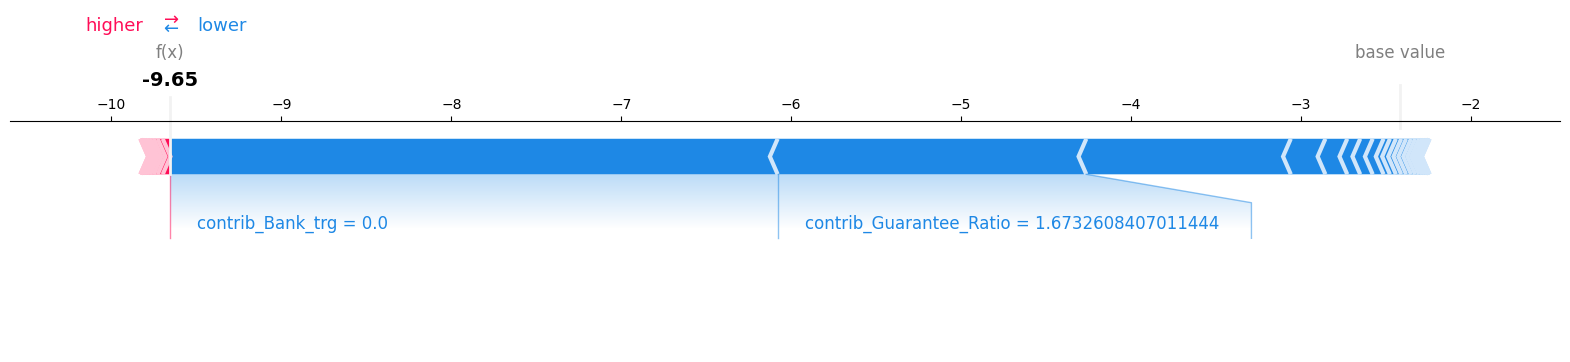

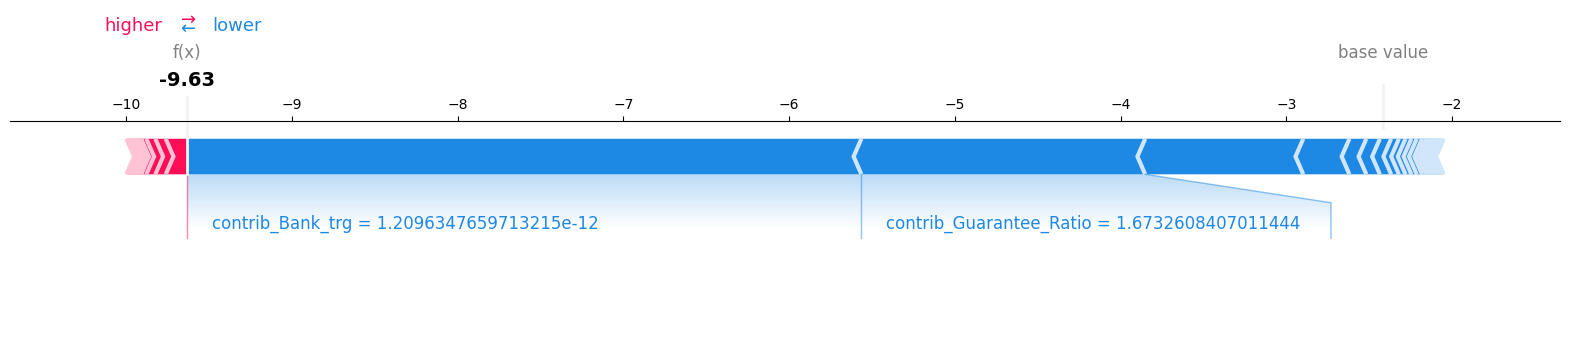

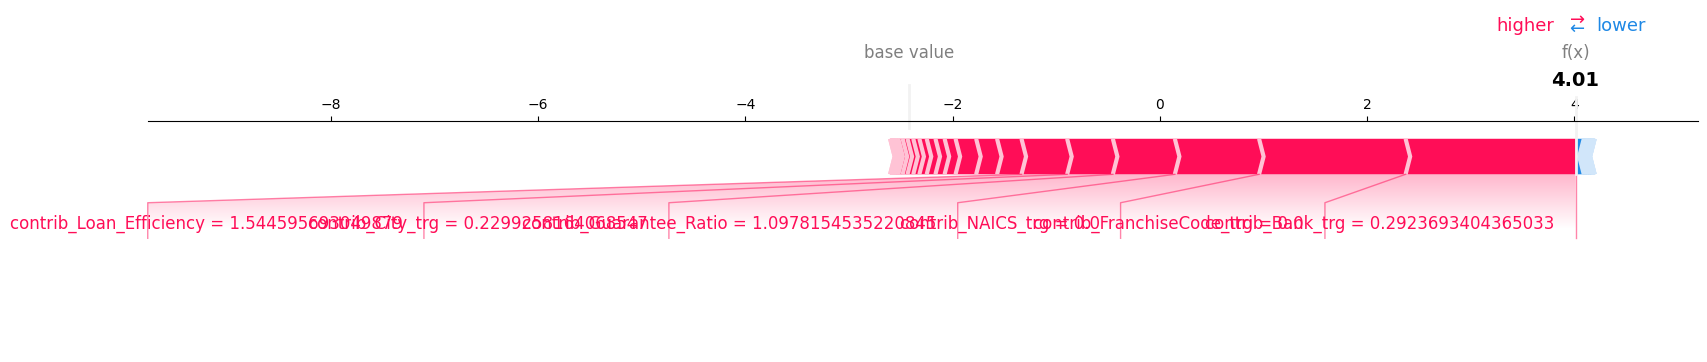

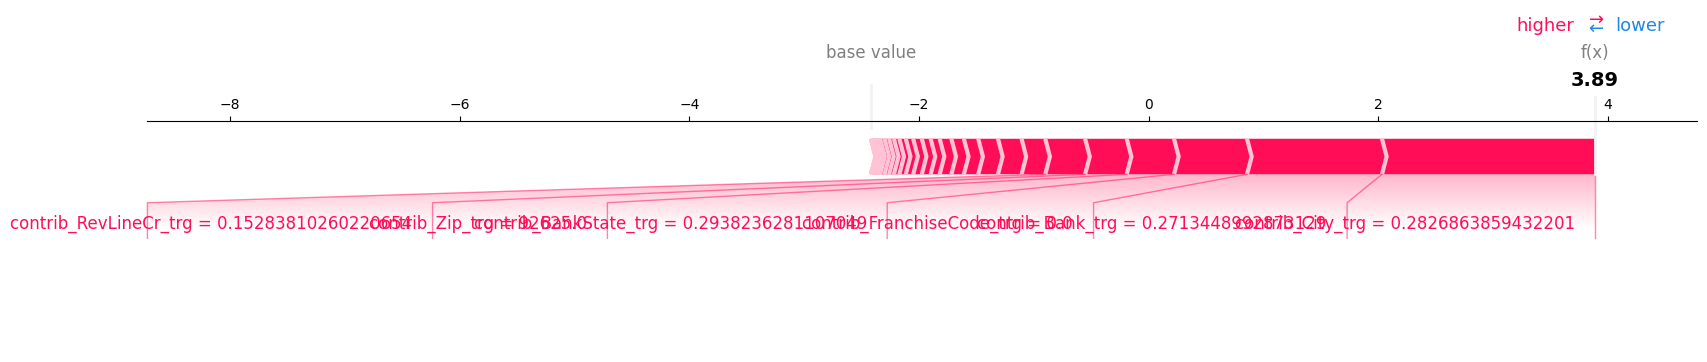

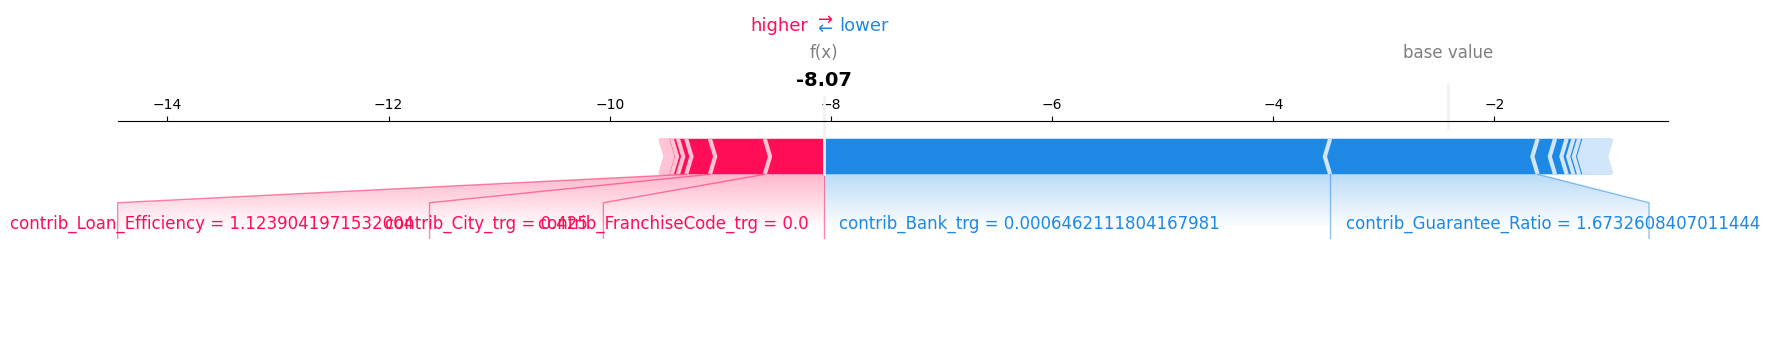

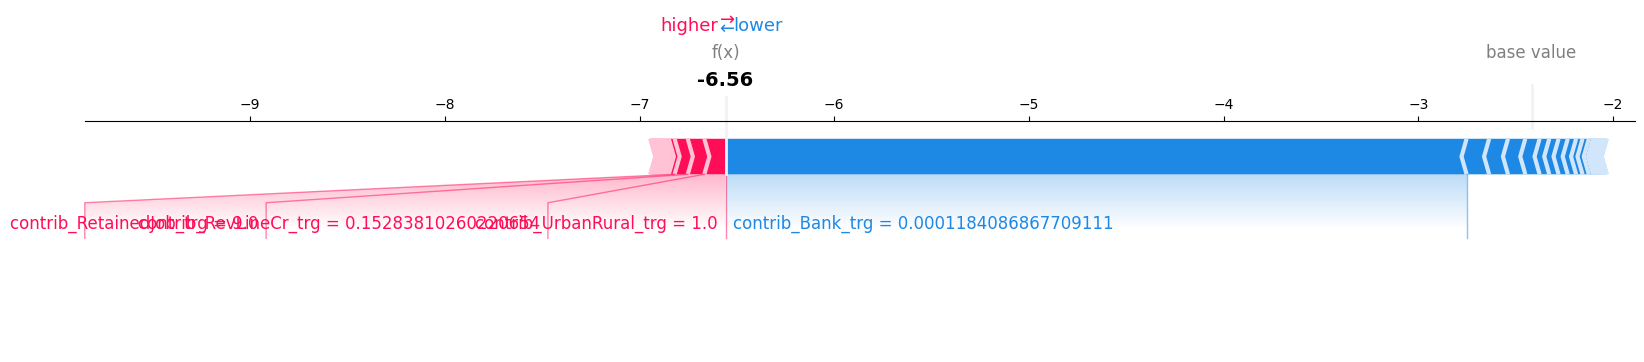

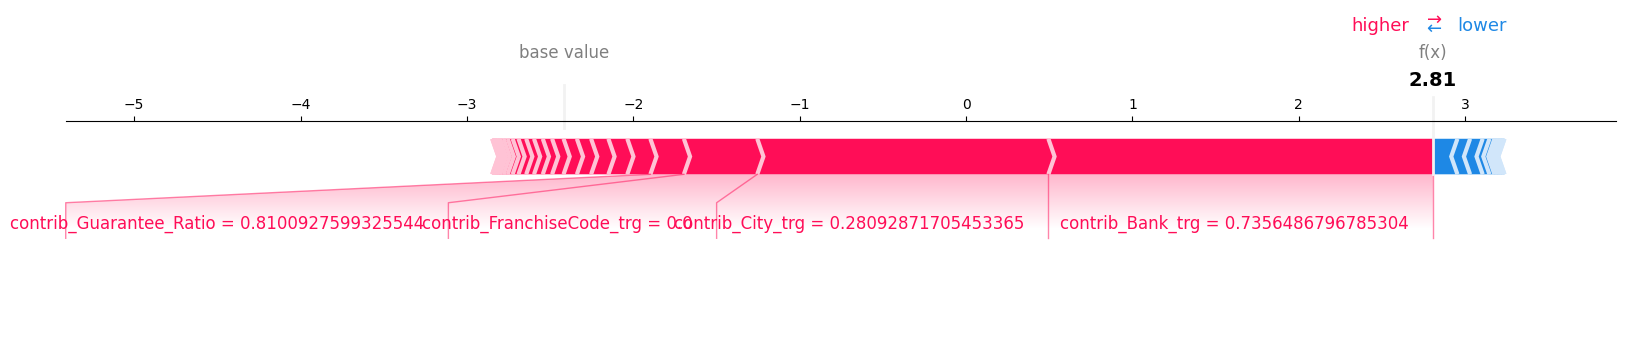

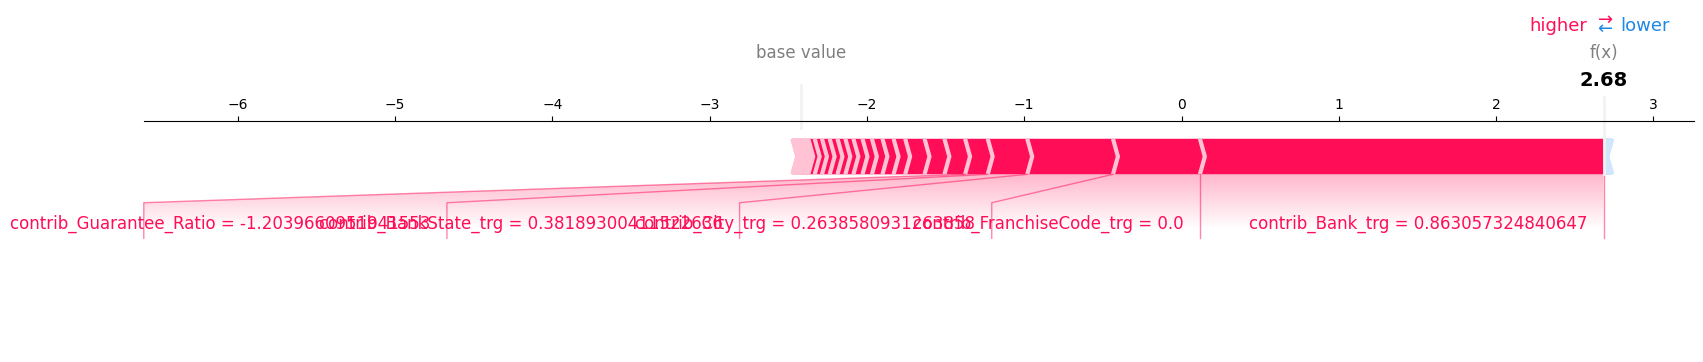

         index  label  probability_0  probability_1
0       384386      0       0.959563       0.040437
1       662652      0       0.876863       0.123137
2       269020      0       0.969019       0.030981
3       752306      0       0.917887       0.082113
4       675193      0       0.999764       0.000236
...        ...    ...            ...            ...
160046   82879      0       0.961051       0.038949
160047  649244      0       0.849320       0.150680
160048  454383      0       0.999608       0.000392
160049  679182      0       0.920222       0.079778
160050  355393      0       0.761576       0.238424

[160051 rows x 4 columns]


In [24]:

print(scoring(X_test))



- Bank_trg has the highest mean absolute SHAP value, indicating it has the largest impact on model predictions, either towards class 0 or class 1.

- Guarantee_Ratio is the next most impactful feature, with significant contributions to both classes.

- City_trg, UrbanRural_trg, and FranchiseCode_trg also have considerable influence on the predictions, with City_trg and UrbanRural_trg having a more balanced impact on both classes.

- Features like DisbursementGross and CreateJob_trg at the bottom of the plot have the smallest impact on the model's output.